In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [4]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data(path="mnist.npz")

In [5]:
X_train[0].shape

(28, 28)

<Figure size 640x480 with 0 Axes>

<Figure size 50x30 with 0 Axes>

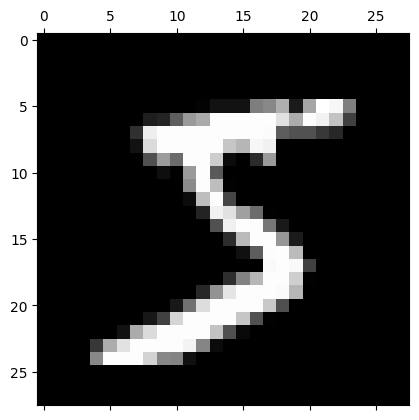

In [6]:
plt.gray()
plt.figure(figsize=(0.5,0.3))
plt.matshow(X_train[0])

In [7]:
len(X_train.ravel())

47040000

In [8]:
y_train.shape

(60000,)

In [9]:
X_train_flatten = X_train.reshape(len(X_train),28*28)
X_test_flatten = X_test.reshape(len(X_test),28*28)

In [10]:
# Without Scaling
model1 = keras.Sequential([
    keras.layers.Dense(10,input_shape= (784,),activation="sigmoid")
])

model1.compile(
    optimizer = "adam",
    loss = 'sparse_categorical_crossentropy',
    metrics= ['accuracy']
    )

model1.fit(X_train_flatten,y_train, epochs =5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7695 - loss: 18.3875
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8795 - loss: 6.1337
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8821 - loss: 5.6346
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8853 - loss: 5.5052
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8896 - loss: 4.9875


In [11]:
from sklearn.preprocessing import MinMaxScaler
scm = MinMaxScaler()
X_train_scaled = scm.fit_transform(X_train_flatten)
X_test_scaled = scm.fit_transform(X_test_flatten)

In [12]:
X_test_scaled.shape

(10000, 784)

In [13]:
# Fitting with Scaled Variables
model2 = keras.Sequential([
    keras.layers.Dense(10,input_shape = (784,), activation = "sigmoid")
])

model2.compile(
    optimizer = "adam",
    loss ='sparse_categorical_crossentropy',
    metrics= ['accuracy']
)

model2.fit(X_train_scaled,y_train, epochs =5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8163 - loss: 0.7098
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9133 - loss: 0.3095
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9213 - loss: 0.2819
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9239 - loss: 0.2755
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9237 - loss: 0.2708


In [14]:
model2.evaluate(X_test_scaled, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9122 - loss: 0.3068


[0.2702193260192871, 0.9247999787330627]

<Figure size 640x480 with 0 Axes>

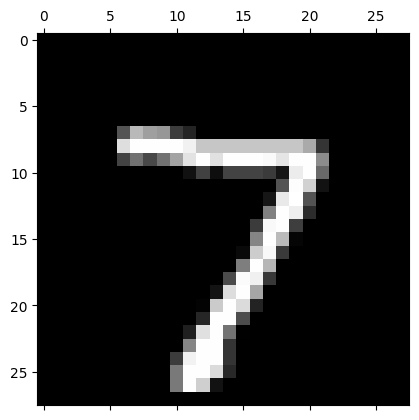

In [15]:
plt.gray()
plt.matshow(X_test[0])

In [18]:
y_predicted = model2.predict(X_test_scaled)
print(y_predicted[0])
print(f"Number: {np.argmax(y_predicted[0])}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[2.0509882e-02 5.1762208e-07 4.2109892e-02 9.6639270e-01 2.8384202e-03
 1.4678417e-01 7.6688161e-07 9.9976140e-01 7.5616963e-02 6.7664045e-01]
Number: 7


In [19]:
ls = []
for i in range(len(y_test)):
    ls.append(np.argmax(y_predicted[i]))

nd_predicted = np.array(ls)
nd_predicted[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9])

In [20]:
pred_comp = [np.argmax(x) for x in y_predicted]

Text(0.5, 1.0, 'Confusion Matrix')

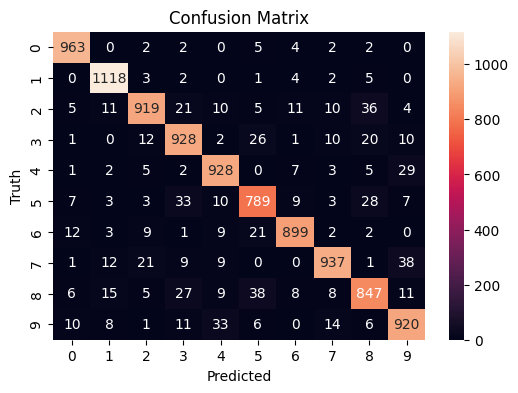

In [21]:
import seaborn as sns
cm  = tf.math.confusion_matrix(y_test,pred_comp)
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot = True,fmt = "d")
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.title("Confusion Matrix")

In [22]:
X_test_flatten.shape

(10000, 784)

In [23]:
# Neural Network with Hidden Layers
model3 = keras.Sequential([
    keras.layers.Dense(100, input_shape= (784,), activation= "relu"),
    keras.layers.Dense(10, activation= "sigmoid")
])

model3.compile(
    optimizer = "adam",
    loss = 'sparse_categorical_crossentropy',
    metrics= ['accuracy']
)

model3.fit(X_train_scaled,y_train,epochs = 10)



Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8683 - loss: 0.4629
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9607 - loss: 0.1337
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9730 - loss: 0.0901
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9805 - loss: 0.0642
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9850 - loss: 0.0502
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9885 - loss: 0.0389
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9911 - loss: 0.0314
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9921 - loss: 0.0257
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9943 - loss: 0.0200
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9952 - loss: 0.0179


In [24]:
model3.evaluate(X_test_scaled,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9738 - loss: 0.0893


[0.07732845097780228, 0.9775999784469604]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


Text(0.5, 1.0, 'Modified Confusion Matrix')

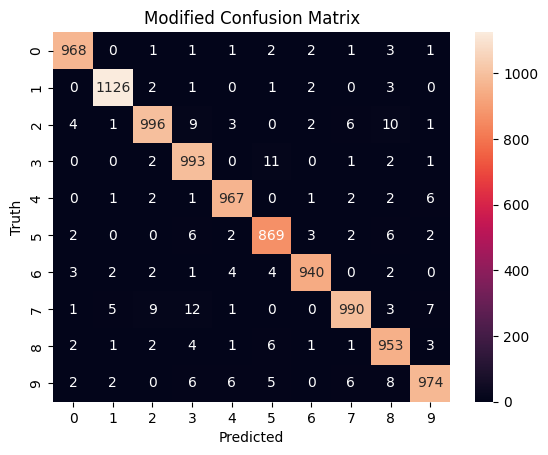

In [25]:
y_hpredicted = model3.predict(X_test_scaled)
y_label = [np.argmax(i) for i in y_hpredicted]
cm2 = tf.math.confusion_matrix(y_test,y_label)
sns.heatmap(cm2,annot= True, fmt= "d")
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.title("Modified Confusion Matrix")

In [29]:
#Without Flattening the Feature Array
from keras import Sequential
fmodel = Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(100, activation = "relu"),
    keras.layers.Dense(10,activation = "sigmoid")
])

fmodel.compile(
    optimizer = "adam",
    loss = 'sparse_categorical_crossentropy',
    metrics= ['accuracy']
)

fmodel.fit(X_train,y_train,epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8008 - loss: 6.9699
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8994 - loss: 0.4036
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9234 - loss: 0.2835
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9329 - loss: 0.2474
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9383 - loss: 0.2283
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9432 - loss: 0.2135
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9454 - loss: 0.2031
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9485 - loss: 0.1973
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9485 - loss: 0.1982
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9492 - loss: 0.1904


In [30]:
fmodel.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9298 - loss: 0.3280


[0.287826269865036, 0.9381999969482422]